In [1]:
import numpy as np
from numpy.linalg import inv,matrix_rank,det
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

# Load the California housing dataset
data = load_iris() # Load as a DataFrame

X = data.data
y = data.target
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### (i) ###

In [2]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Print the shapes of the datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (120, 4), (120,)
Validation set shape: (15, 4), (15,)
Test set shape: (15, 4), (15,)


### (ii) ###

In [3]:
# Convert the target variable to one-hot encoding
onehot_encoder = OneHotEncoder(sparse_output=False)
reshaped = y_train.reshape(len(y_train), 1) # 1D array to 2D array
Ytr_onehot = onehot_encoder.fit_transform(reshaped)

reshaped = y_val.reshape(len(y_val), 1)
Yval_onehot = onehot_encoder.fit_transform(reshaped)

reshaped = y_test.reshape(len(y_test), 1)
Yts_onehot = onehot_encoder.fit_transform(reshaped)

Yts_onehot


array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

### (iii) ###

In [4]:
# check if X^T * X is invertible
def check_inverse_rank(matrix):
    rank = matrix_rank(matrix, tol=1e-12)
    print("matrix rank is : "+ str(rank))
    print("matrix size is : "+ str(matrix.shape))

    if matrix.shape[0] == matrix.shape[1]:
       if rank == matrix.shape[0]:
           print("matrix is invertible")
       else:
           print("matrix is not invertible")
    else:
       print("matrix is not square, hence not invertible")

    return (rank == matrix.shape[0]) and (matrix.shape[0] == matrix.shape[1])

def check_inverse_det(matrix, tol=1e-12):
    deter = det(matrix)
    print("determinant is : " + str(deter))
    if abs(deter) < tol:
        print("matrix is invertible")
    else:
        print("matrix is not invertible")

In [5]:
order = 1
lamda = 0.00001

# Augment 1 to X
Poly = PolynomialFeatures(order)
X_train_poly = Poly.fit_transform(X_train)
X_val_poly = Poly.fit_transform(X_val)
X_test_poly = Poly.fit_transform(X_test)

# Fit a linear regression model
if check_inverse_rank(X_train_poly.T @ X_train_poly):
    print("Applying linear regression without regularization")
    W = inv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ Ytr_onehot
else:
    print("Applying linear regression with regularization")
    W = inv(X_train_poly.T @ X_train_poly + lamda * np.eye(X_train_poly.shape[1])) @ X_train_poly.T @ Ytr_onehot

print(f"W: {W}")
# Predict on the training, validation, and test sets
Ytr_est = X_train_poly @ W # probability
Ytr_class = np.argmax(Ytr_est, axis=1) #class predictions
Yval_est = X_val_poly @ W
Yval_class = np.argmax(Yval_est, axis=1)
Yts_est = X_test_poly @ W
Yts_class = np.argmax(Yts_est, axis=1)

# Calculate and print the accuracy for training, validation sets and test sets
acc_train = accuracy_score(y_train, Ytr_class)
acc_val = accuracy_score(y_val, Yval_class)
acc_test = accuracy_score(y_test, Yts_class)
print(f"Training acc: {acc_train}, Validation acc: {acc_val}, Test acc: {acc_test}")
cm_test = confusion_matrix(y_test, Yts_class)
print("Confusion Matrix for Test Set:")
print(cm_test)

matrix rank is : 5
matrix size is : (5, 5)
matrix is invertible
Applying linear regression without regularization
W: [[ 0.13188164  1.48370913 -0.61559077]
 [ 0.04588534  0.02456411 -0.07044945]
 [ 0.26240911 -0.46504036  0.20263126]
 [-0.21414513  0.17337652  0.04076861]
 [-0.0595484  -0.42849919  0.48804758]]
Training acc: 0.8416666666666667, Validation acc: 0.8, Test acc: 0.9333333333333333
Confusion Matrix for Test Set:
[[5 0 0]
 [0 5 1]
 [0 0 4]]


### (iv) ###

In [6]:
# Compute prediction, cost and gradient based on categorical cross entropy
def multi_logistic_cost_gradient(X, W, Y, eps=1e-15):
    z = X @ W
    z_max = np.max(z, axis=-1, keepdims=True)  # for numerical stability
    exp_z = np.exp(z - z_max)
    pred_Y = exp_z / np.sum(exp_z, axis=-1, keepdims=True)

    # Clip predictions to prevent log(0)
    pred_Y = np.clip(pred_Y, eps, 1 - eps)
    
    N = X.shape[0]  # Number of samples
    cost   = (np.sum(-(Y * np.log(pred_Y))))/N
    gradient = (X.T @ (pred_Y-Y))/N

    return pred_Y, cost, gradient

In [7]:
# Perform multinormial logistic regression
def multinormial_logistic_regression(P, W, Y, lr, num_iters):
    pred_Y, cost, gradient = multi_logistic_cost_gradient(P, W, Y)
    print('Initial Cost =', cost)
    print('Initial Weights =', W)
    cost_vec = np.zeros(num_iters+1)
    cost_vec[0] = cost

    for i in range(1, num_iters + 1):
        W -= lr * gradient
        pred_Y, cost, gradient = multi_logistic_cost_gradient(P, W, Y)
        cost_vec[i] = cost
        if i % 2000 == 0:
            print(f"Iteration {i}, Cost: {cost}")

    return W, cost_vec, pred_Y       

In [8]:
lr_list = [0.1, 0.01, 0.001]
acc_train_list_Log = []
acc_val_list_Log = []
num_iters = 20000
order = 1
cost_dict = {}
max_val_acc = 0
best_lr = 0

# Augment 1 to X
Poly = PolynomialFeatures(order)
X_train_poly = Poly.fit_transform(X_train)
X_val_poly = Poly.fit_transform(X_val)
X_test_poly = Poly.fit_transform(X_test)

for lr in lr_list:
    # Initialize weights
    np.random.seed(42)  # For reproducibility
    W = np.random.randn(X_train_poly.shape[1], Ytr_onehot.shape[1])

    # Fit a logistic regression model
    print(f"Fitting logistic regression for learning rate {lr}...")
    W_opt, cost_vec, Ytr_est = multinormial_logistic_regression(X_train_poly, W, Ytr_onehot, lr, num_iters)
    print(f"W for learning rate {lr}: {W_opt}")

    # Compute training, validataion accuracies.
    train_acc = accuracy_score(y_train, np.argmax(Ytr_est, axis=1))
    Yval_est,_,_ = multi_logistic_cost_gradient(X_val_poly, W_opt, Yval_onehot)
    val_acc = accuracy_score(y_val, np.argmax(Yval_est, axis=1))
    print(f"Training accuracy for learning rate {lr}: {train_acc}")
    print(f"Validation accuracy for learning rate {lr}: {val_acc} \n")
    acc_train_list_Log.append(train_acc)
    acc_val_list_Log.append(val_acc)

    # store cost vector for each learning rate
    cost_dict[lr] = cost_vec

    # Check for the best validation accuracy
    if val_acc > max_val_acc:
        max_val_acc = val_acc
        best_lr = lr
        Yts_est,_,_ = multi_logistic_cost_gradient(X_test_poly, W_opt, Yts_onehot)
        test_acc = accuracy_score(y_test, np.argmax(Yts_est, axis=1))
        cm_test = confusion_matrix(y_test, np.argmax(Yts_est, axis=1))

print(f"Best learning rate: {best_lr}, Max validation accuracy: {max_val_acc}")
print(f"Test accuracy for the best learning rate {best_lr}: {test_acc}")
print("Confusion Matrix for Test Set:")
print(cm_test)


Fitting logistic regression for learning rate 0.1...
Initial Cost = 15.715390441695714
Initial Weights = [[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783]]
Iteration 2000, Cost: 0.09600030387613748
Iteration 4000, Cost: 0.0781181372988036
Iteration 6000, Cost: 0.07119869072924714
Iteration 8000, Cost: 0.06740170623542091
Iteration 10000, Cost: 0.0649439827535052
Iteration 12000, Cost: 0.06318812659469544
Iteration 14000, Cost: 0.06184812082322718
Iteration 16000, Cost: 0.06077613965076268
Iteration 18000, Cost: 0.059887967811441574
Iteration 20000, Cost: 0.059132069994626765
W for learning rate 0.1: [[ 1.17564676  3.48908787 -3.65859625]
 [ 2.1813154   1.04155104 -2.16812691]
 [ 5.20674941  1.34010677 -4.66968302]
 [-6.24012133 -0.05527538  5.9088093 ]
 [-3.03665547 -4.67046328  4.31088294]]
Training accuracy for learning rate 0.1: 0.975
Valid

Training acc:  [0.975, 0.975, 0.975]
Validation acc:  [1.0, 1.0, 1.0]


Text(0.5, 1.0, 'Multinormial_logistic_regression')

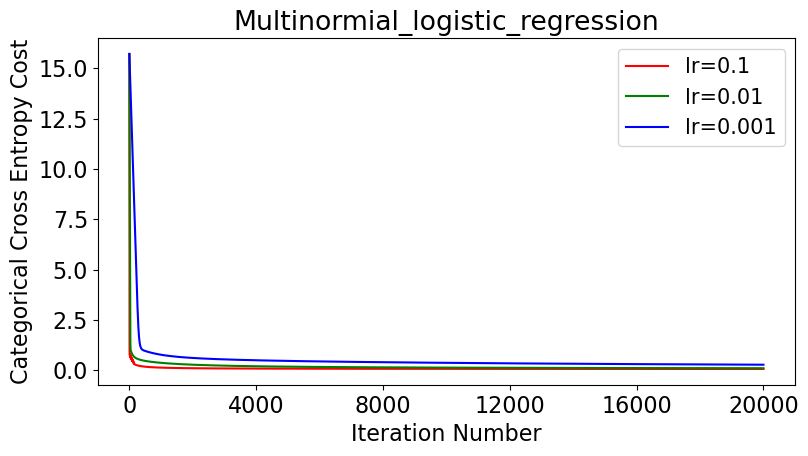

In [9]:
print('Training acc: ', str(acc_train_list_Log))
print('Validation acc: ', str(acc_val_list_Log))
# Plot cost function values over iterations for each learning rate
plt.figure(0, figsize=[9,4.5])
plt.rcParams.update({'font.size': 16})
colors = ['r', 'g', 'b']

for i, (lr, cost_vec) in enumerate(cost_dict.items()):
    plt.plot(np.arange(0, num_iters+1, 1), cost_vec, color=colors[i], label=f'lr={lr}')
plt.legend(loc='upper right', fontsize=15)
plt.xlabel('Iteration Number')
plt.ylabel('Categorical Cross Entropy Cost')
plt.xticks(np.arange(0, num_iters+1, 4000))
plt.title('Multinormial_logistic_regression')

# Using sklearn's Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print("model coefficients:", model.coef_)
print("model intercept:", model.intercept_)
y_pred_train = model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train)
y_pred_val = model.predict(X_val)
val_acc = accuracy_score(y_val, y_pred_val)
y_pred_test = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
print(f"Training accuracy using sklearn: {train_acc}")
print(f"Validation accuracy using sklearn: {val_acc}")
print(f"Test accuracy using sklearn: {test_acc}")

model coefficients: [[-0.39705946  0.96066053 -2.37396368 -1.00330112]
 [ 0.51283652 -0.25352109 -0.21527075 -0.76918663]
 [-0.11577705 -0.70713943  2.58923443  1.77248775]]
model intercept: [  9.03180018   1.84145661 -10.87325679]
Training accuracy using sklearn: 0.975
Validation accuracy using sklearn: 1.0
Test accuracy using sklearn: 1.0
